In [50]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [51]:
def histogram_equalization(img):
  height, width = img.shape
  total_pixels = height * width

  plt.figure(figsize=(15, 4))

  histogram = [0] * 256
  for i in range(height):
      for j in range(width):
          pixel_value = img[i, j]
          histogram[pixel_value] += 1
  plt.subplot(1, 3, 1)
  plt.bar(range(256), histogram, color='gray')
  plt.title('Original Histogram')
  plt.xlabel('Pixel Intensity')
  plt.ylabel('Frequency')

  cdf = [0] * 256
  cdf[0] = histogram[0]
  for i in range(1, 256):
      cdf[i] = cdf[i - 1] + histogram[i]

  plt.subplot(1, 3, 2)
  plt.plot(cdf, color='red')
  plt.title('CDF of Original Image')
  plt.xlabel('Pixel Intensity')
  plt.ylabel('Cumulative Frequency')

  cdf_min = next((val for val in cdf if val > 0), 0)

  equalized_map = [0] * 256
  for i in range(256):
      equalized_map[i] = round(((cdf[i] - cdf_min) / (total_pixels - cdf_min)) * 255)
  equalized_img = np.zeros_like(img, dtype=np.uint8)
  for i in range(height):
      for j in range(width):
          old_value = img[i, j]
          equalized_img[i, j] = equalized_map[old_value]

  plt.subplot(1, 3, 3)
  plt.hist(equalized_img.flatten(), bins=256, range=[0,256], color='blue')
  plt.title('Equalized Histogram')
  plt.xlabel('Pixel Intensity')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()
  return equalized_img

# Dark Image

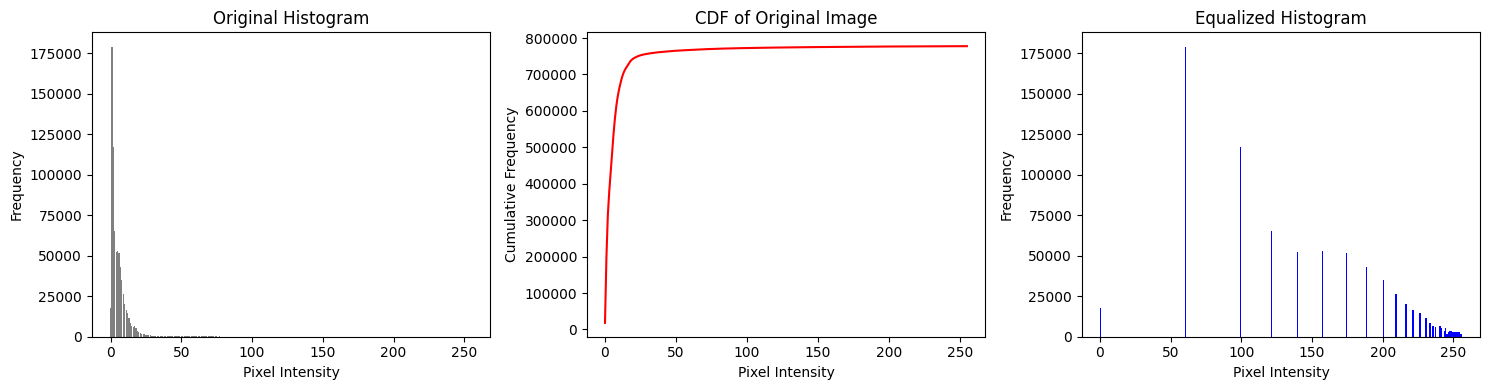

In [52]:
input_file = 'dark_image.jpg'
output_file = 'enhanced_dark_image.jpg'
img = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Error: Could not load image from {input_file}")
    exit()

enhanced_img = histogram_equalization(img)

Enhanced image saved to enhanced_dark_image.jpg


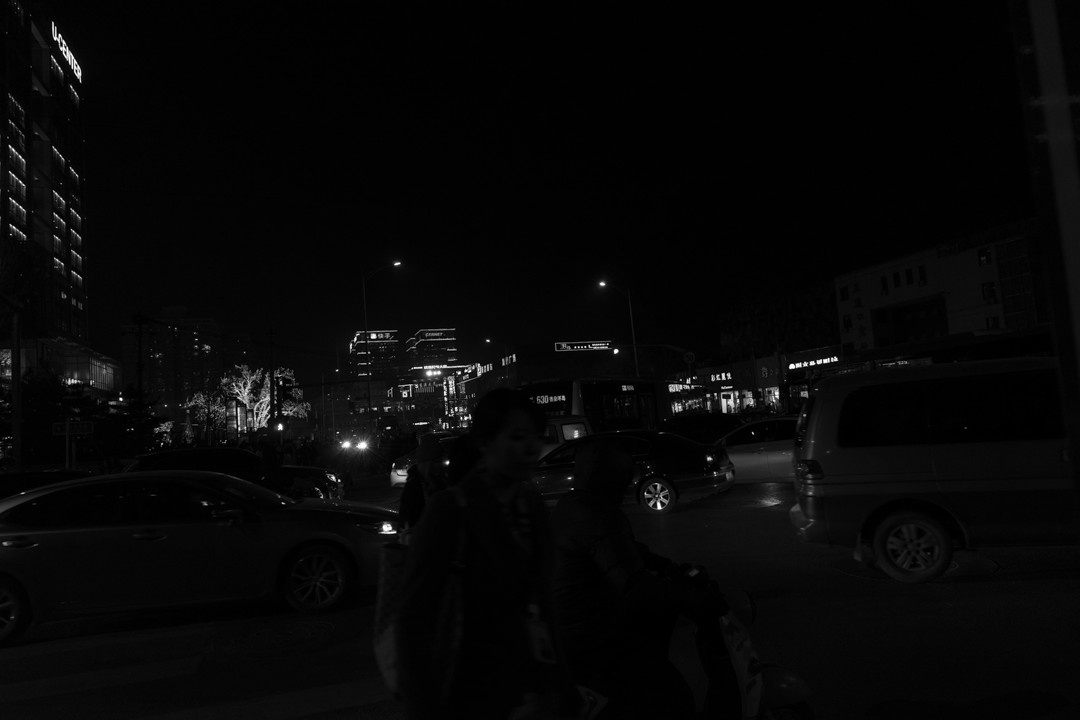

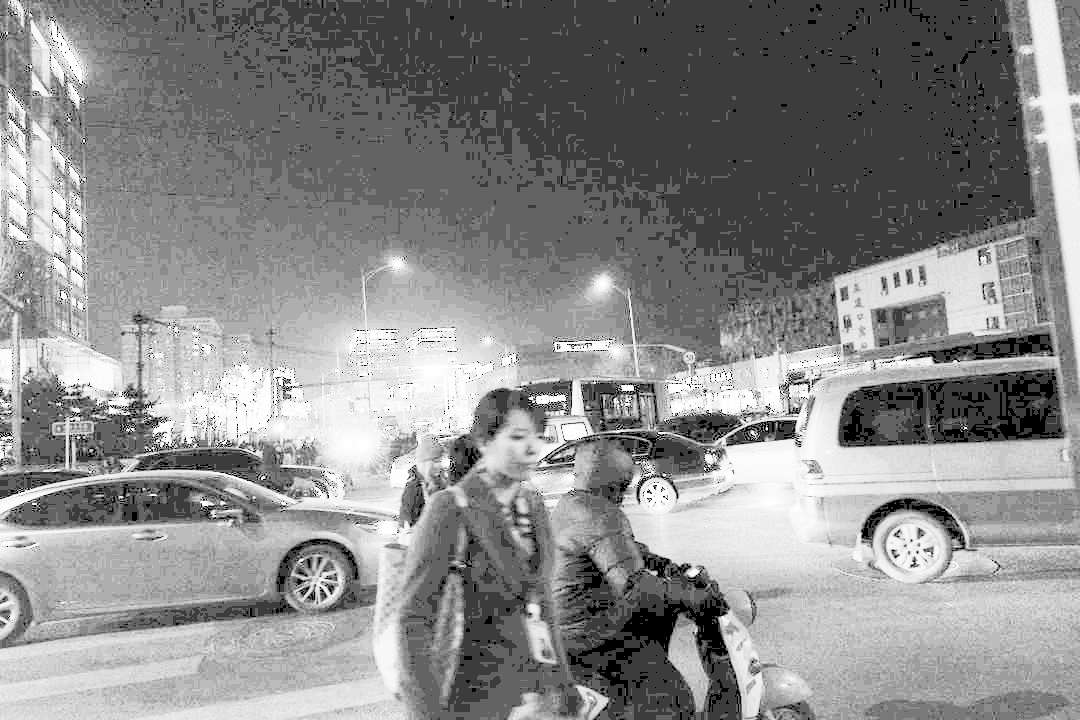

In [53]:
cv2.imwrite(output_file, enhanced_img)
print(f"Enhanced image saved to {output_file}")

cv2_imshow(img)
cv2_imshow(enhanced_img)

# Bright Image

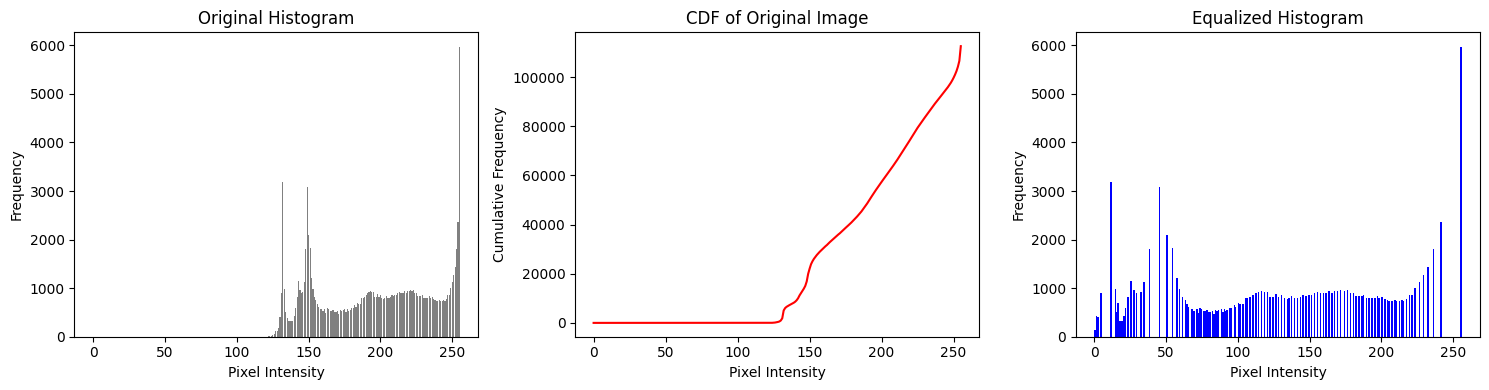

In [76]:
input_file = 'bright_image.jpg'
output_file = 'enhanced_bright_image.jpg'

img = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)
if img is None:
    print(f"Error: Could not load image from {input_file}")
    exit()

enhanced_img = histogram_equalization(img)

Enhanced image saved to enhanced_bright_image.jpg


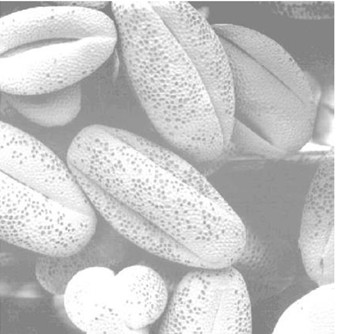

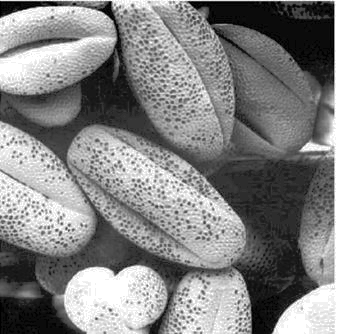

In [77]:
cv2.imwrite(output_file, enhanced_img)
print(f"Enhanced image saved to {output_file}")

cv2_imshow(img)
cv2_imshow(enhanced_img)